COVID-19 Data Analysis
Enter the start date in YYYY-MM-DD format (e.g., '2021-01-01'): 2019-02-02
Enter the end date in YYYY-MM-DD format (e.g., '2021-12-31'): 2021-02-02
Enter the country names (comma-separated, e.g., 'India, United States, Brazil'): India, United States, Brazil 

Available metrics to visualize: ['new_cases', 'new_deaths', 'total_cases', 'total_deaths', 'daily_vaccinations', 'total_vaccinations', 'recovery_rate', 'cases_per_million', 'deaths_per_million', 'vaccination_rate']
Enter metrics to visualize (comma-separated): new_cases, total_cases

Descriptive Analysis:
          new_cases    new_deaths   total_cases   total_deaths  \
count  1.185000e+03   1185.000000  1.185000e+03    1185.000000   
mean   3.858880e+04    699.631224  4.145087e+06   96044.806751   
std    1.595090e+05   2533.500104  5.106481e+06   98454.431616   
min    0.000000e+00      0.000000  0.000000e+00       0.000000   
25%    0.000000e+00      0.000000  2.649600e+04     824.000000   
50%    0.00000

<ipython-input-3-bd08e9fe0737>:93: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




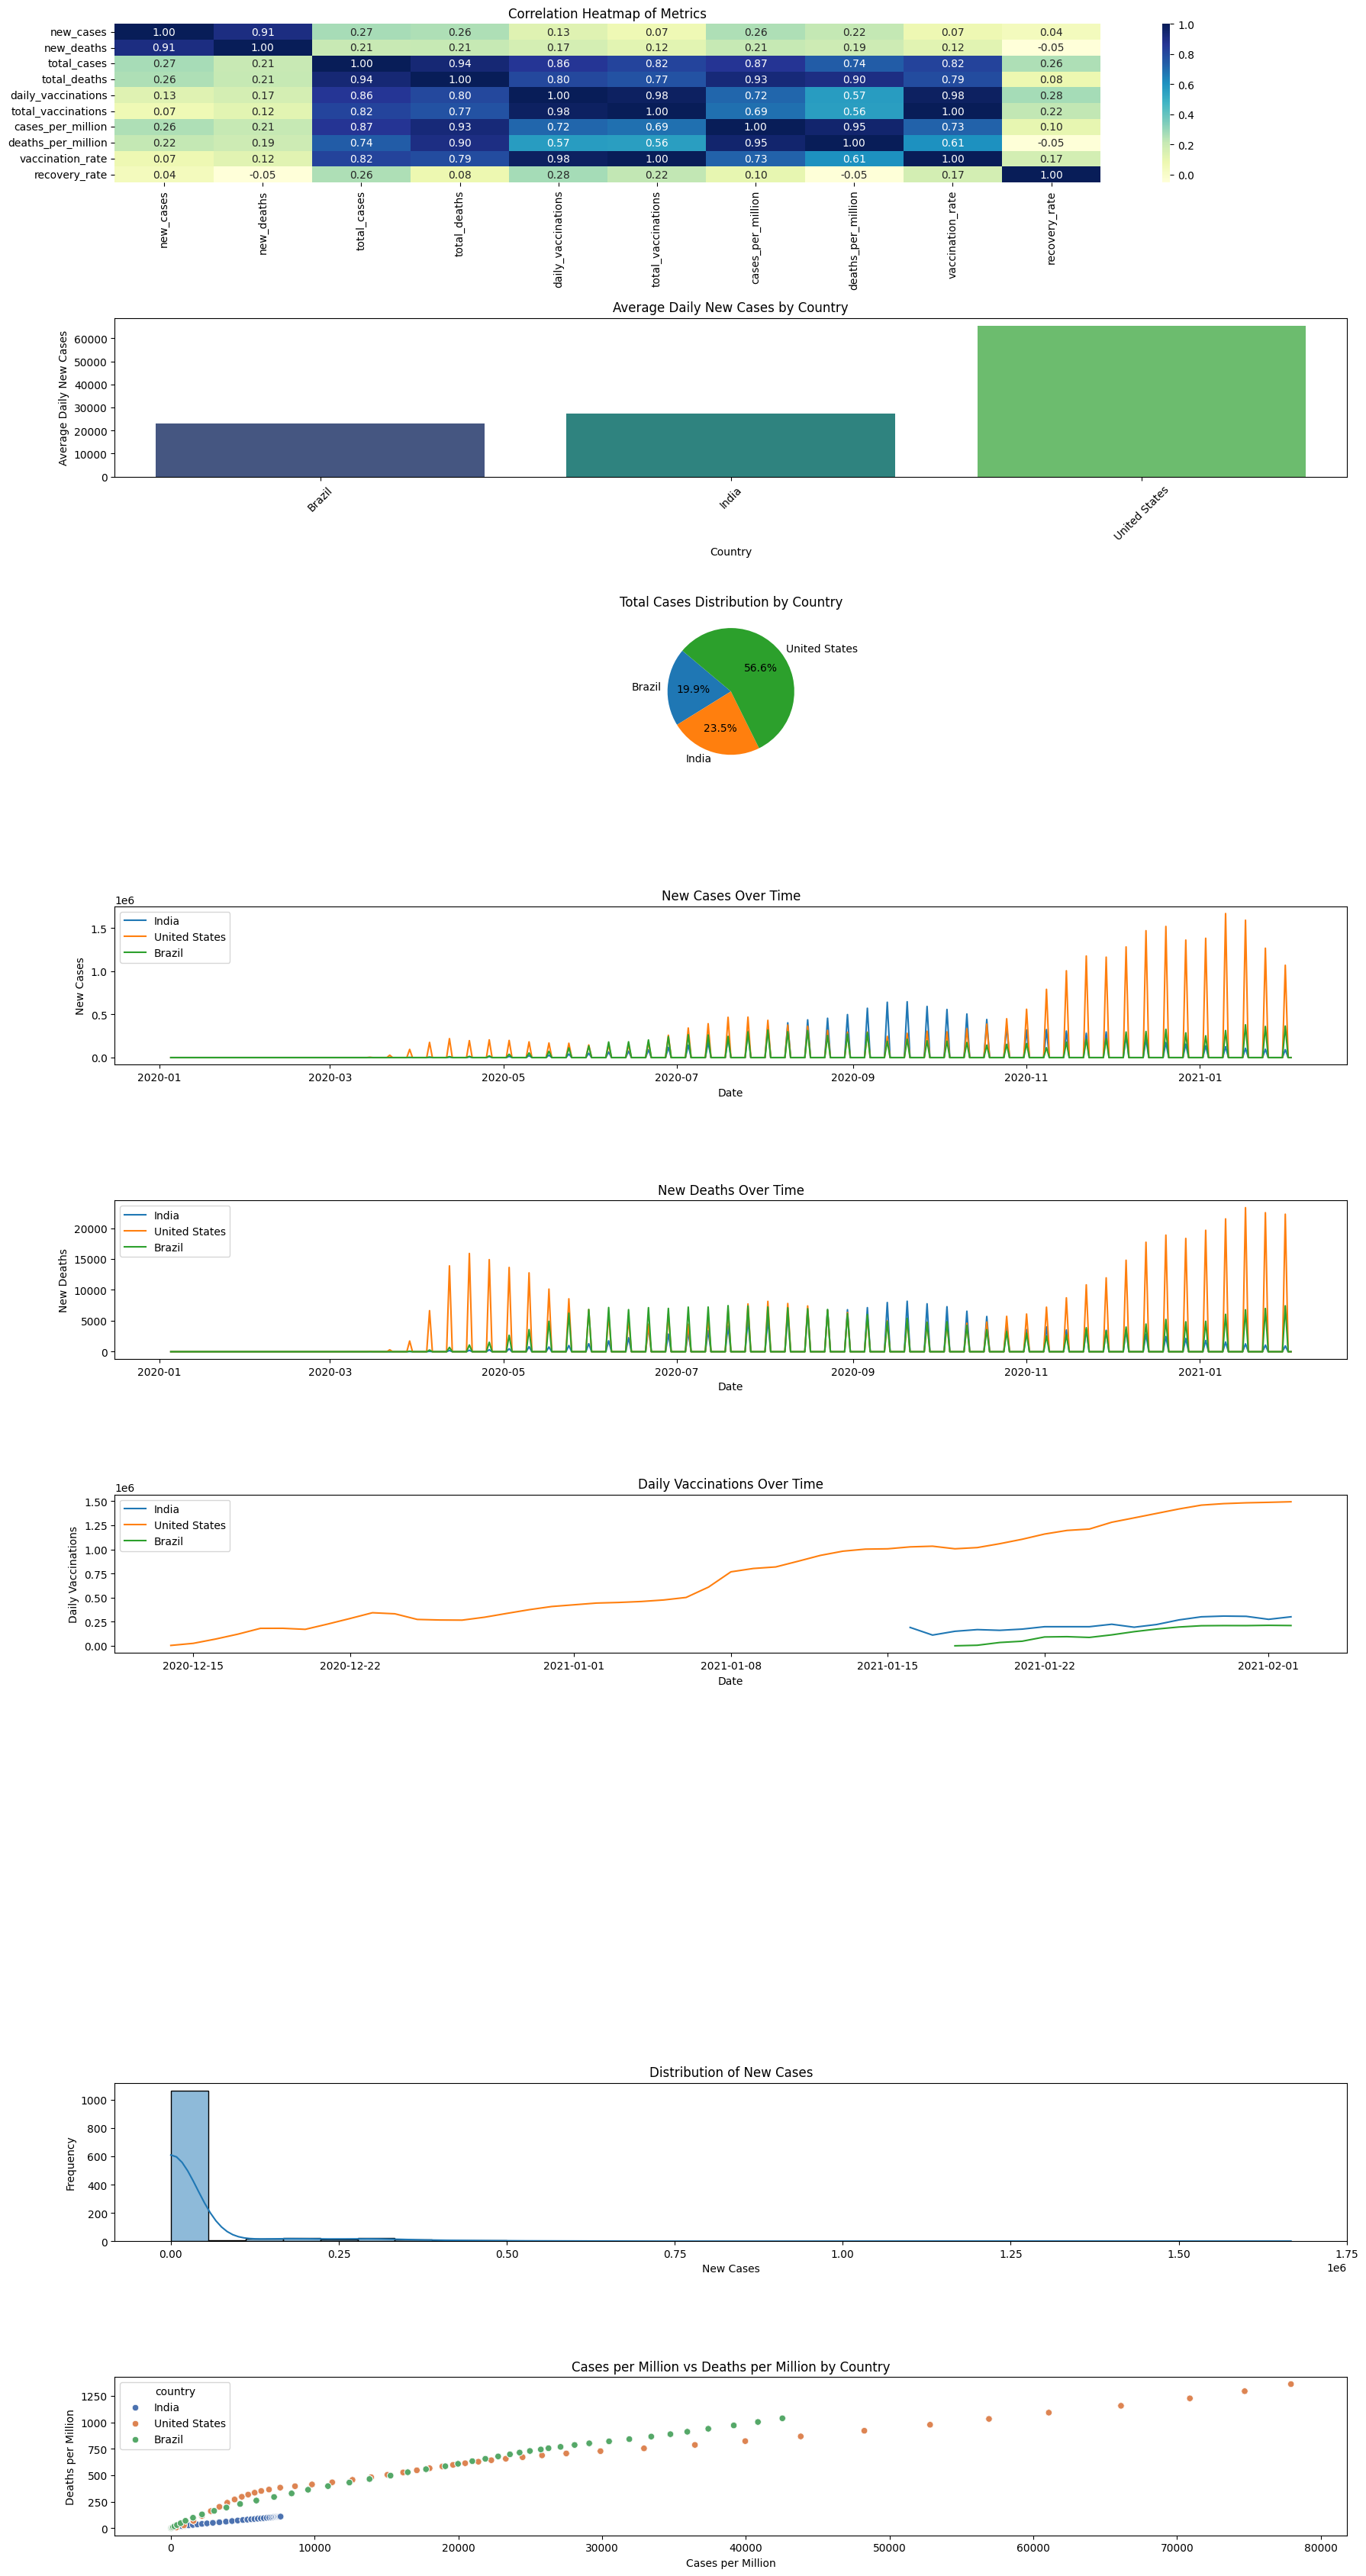


Predictive Analysis:


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



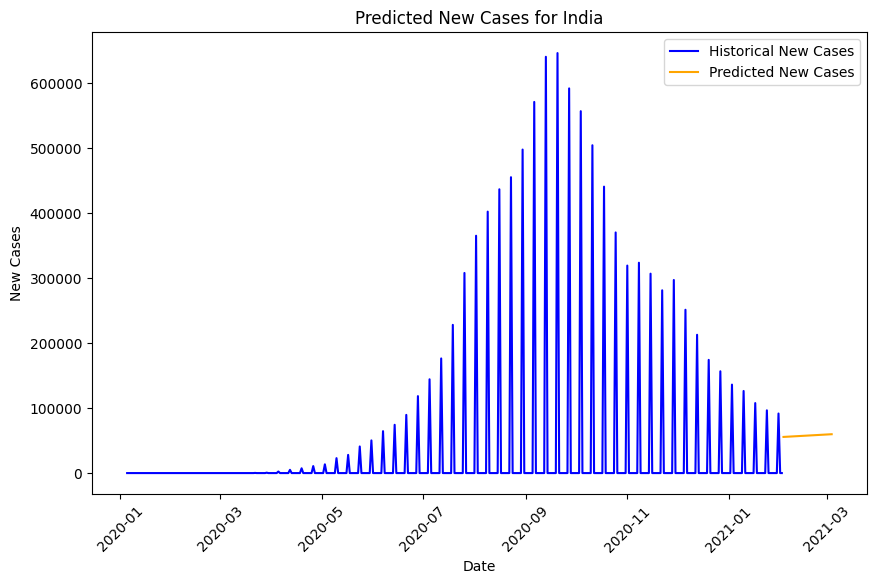

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



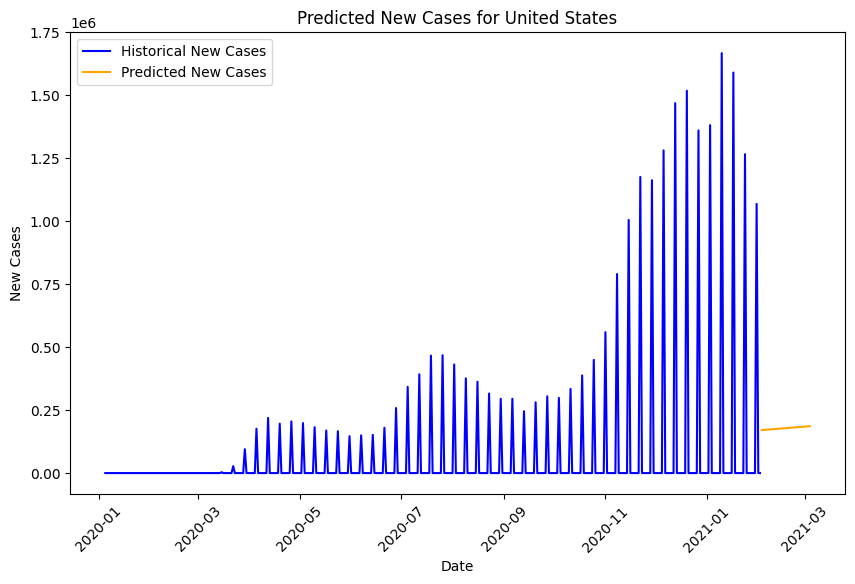

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



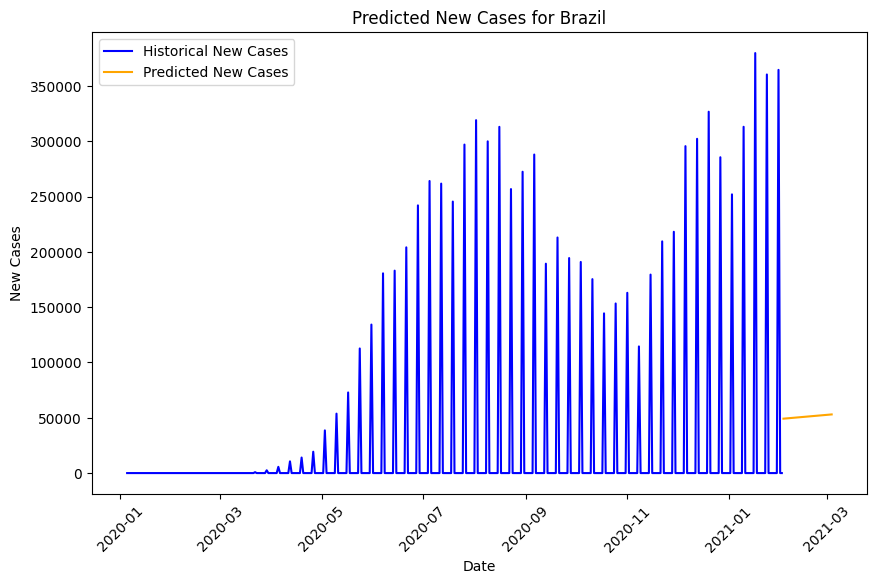


Prescriptive Analysis:
Recommendations for India:
- Increase vaccination campaigns.
Recommendations for United States:
- Increase vaccination campaigns.
Recommendations for Brazil:
- Increase vaccination campaigns.


In [3]:
import pandas as pd  # Import pandas for data manipulation and analysis
import numpy as np  # Import numpy for numerical operations
import seaborn as sns  # Import seaborn for statistical data visualization
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import plotly.express as px  # Import plotly for interactive visualizations
from sklearn.linear_model import LinearRegression  # Import LinearRegression for predictive analysis

# Load datasets from online sources
url_cases = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
url_vaccinations = "https://covid.ourworldindata.org/data/vaccinations/vaccinations.csv"
url_population = "https://raw.githubusercontent.com/datasets/population/master/data/population.csv"

cases_data = pd.read_csv(url_cases)  # Load COVID-19 case data
vaccinations_data = pd.read_csv(url_vaccinations)  # Load vaccination data
population_data = pd.read_csv(url_population)  # Load population data

# Function to get the latest population of a given country
def get_population(country):
    pop = population_data[population_data['Country Name'] == country]  # Filter population data for the country
    if not pop.empty:
        return pop.iloc[-1]['Value']  # Return the latest population value if found
    return None  # Return None if no data found

# Function to analyze COVID-19 data
def analyze_covid_data(countries, start_date_str, end_date_str, metrics):
    combined_data = pd.DataFrame()  # Initialize an empty DataFrame to store combined data

    # Data collection and merging for each country
    for country in countries:
        # Extract case and vaccination data for the country
        cases_country = cases_data[cases_data['location'] == country][['date', 'new_cases', 'new_deaths', 'total_cases', 'total_deaths']]
        vaccinations_country = vaccinations_data[vaccinations_data['location'] == country][['date', 'daily_vaccinations', 'total_vaccinations']]

        # Check if data is available for the country
        if cases_country.empty or vaccinations_country.empty:
            print(f"No data found for {country}.")
            continue  # Skip to the next country if no data is found

        # Convert date columns to datetime format
        cases_country['date'] = pd.to_datetime(cases_country['date'])
        vaccinations_country['date'] = pd.to_datetime(vaccinations_country['date'])

        # Merge case and vaccination data on the date
        merged_data = pd.merge(cases_country, vaccinations_country, on='date', how='outer')
        merged_data.set_index('date', inplace=True)  # Set date as the index

        # Filter merged data by the specified date range
        start_date = pd.to_datetime(start_date_str)
        end_date = pd.to_datetime(end_date_str)
        merged_data = merged_data[(merged_data.index >= start_date) & (merged_data.index <= end_date)]

        # Get the population for the country
        population = get_population(country)
        if population:
            # Calculate metrics per million and vaccination rates
            merged_data['cases_per_million'] = (merged_data['total_cases'] / population) * 1_000_000
            merged_data['deaths_per_million'] = (merged_data['total_deaths'] / population) * 1_000_000
            merged_data['vaccination_rate'] = (merged_data['total_vaccinations'] / population) * 100
            merged_data['recovery_rate'] = (merged_data['total_cases'] - merged_data['total_deaths']) / merged_data['total_cases'] * 100

        # Add a column for the country name
        merged_data['country'] = country
        combined_data = pd.concat([combined_data, merged_data])  # Concatenate data for each country

    # Check if combined data is empty
    if combined_data.empty:
        print("No data available for the specified countries and date range.")
        return

    # Descriptive Analysis
    print("\nDescriptive Analysis:")
    print(combined_data.describe())  # Display descriptive statistics

    # Diagnostic Analysis
    print("\nDiagnostic Analysis:")
    numeric_data = combined_data.select_dtypes(include=[np.number])  # Select numeric columns for analysis
    correlation_matrix = numeric_data.corr()  # Calculate correlation matrix
    print("Correlation matrix between metrics:")
    print(correlation_matrix)

    # Visualizations
    plt.figure(figsize=(18, 45))  # Set figure size

    # Heatmap for Correlation between Metrics
    plt.subplot(len(metrics) + 10, 1, 1)  # Create a subplot for the heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")  # Draw the heatmap
    plt.title("Correlation Heatmap of Metrics")
    plt.tight_layout()

    # Bar Chart for Average Daily New Cases
    plt.subplot(len(metrics) + 10, 1, 2)  # Create a subplot for bar chart
    avg_daily_cases = combined_data.groupby('country')['new_cases'].mean().reset_index()  # Calculate average daily cases
    sns.barplot(data=avg_daily_cases, x='country', y='new_cases', palette='viridis')  # Draw the bar chart
    plt.title("Average Daily New Cases by Country")
    plt.xlabel("Country")
    plt.ylabel("Average Daily New Cases")
    plt.xticks(rotation=45)  # Rotate x-axis labels

    # Pie Chart for Total Cases Distribution
    plt.subplot(len(metrics) + 10, 1, 3)  # Create a subplot for pie chart
    total_cases_per_country = combined_data.groupby('country')['total_cases'].max().reset_index()  # Get total cases per country
    plt.pie(total_cases_per_country['total_cases'], labels=total_cases_per_country['country'], autopct='%1.1f%%', startangle=140)  # Draw the pie chart
    plt.title("Total Cases Distribution by Country")

    # Line Chart for New Cases, New Deaths, and Daily Vaccinations
    for i, metric in enumerate(['new_cases', 'new_deaths', 'daily_vaccinations'], 4):
        plt.subplot(len(metrics) + 10, 1, i)  # Create a subplot for each metric
        for country in countries:
            country_data = combined_data[combined_data['country'] == country]  # Filter data for the country
            if not country_data.empty and country_data[metric].notna().any():  # Check for non-empty data
                sns.lineplot(data=country_data, x=country_data.index, y=metric, label=country)  # Draw line plot for the metric

        plt.title(f"{metric.replace('_', ' ').title()} Over Time")  # Set title for the plot
        plt.xlabel("Date")
        plt.ylabel(metric.replace("_", " ").title())  # Set ylabel
        plt.legend()  # Add legend

    # Histogram for New Cases Distribution
    plt.subplot(len(metrics) + 10, 1, 8)  # Create a subplot for the histogram
    sns.histplot(combined_data['new_cases'].dropna(), bins=30, kde=True)  # Draw histogram with KDE
    plt.title("Distribution of New Cases")
    plt.xlabel("New Cases")
    plt.ylabel("Frequency")

    # Scatter Plot for Cases per Million vs Deaths per Million
    plt.subplot(len(metrics) + 10, 1, 9)  # Create a subplot for the scatter plot
    valid_data = combined_data.dropna(subset=['cases_per_million', 'deaths_per_million'])  # Drop rows with NaN values
    if not valid_data.empty:
        sns.scatterplot(data=valid_data, x='cases_per_million', y='deaths_per_million', hue='country', palette='deep')  # Draw scatter plot
        plt.title("Cases per Million vs Deaths per Million by Country")
        plt.xlabel("Cases per Million")
        plt.ylabel("Deaths per Million")

    plt.tight_layout()  # Adjust layout
    plt.show()  # Display plots

    # Plotly General Chart for all selected metrics
    for country in countries:
        country_data = combined_data[combined_data['country'] == country].reset_index()  # Reset index for plotly
        fig = px.line(country_data, x='date', y=metrics,
                      title=f'COVID-19 Metrics Over Time for {country}',
                      labels={'value': 'Count', 'variable': 'Metrics'},
                      template='plotly_dark')  # Create a plotly line chart
        fig.show()  # Show plotly figure

    # Predictive Analysis
    print("\nPredictive Analysis:")
    for country in countries:
        country_data = combined_data[combined_data['country'] == country]  # Filter data for the country
        if not country_data.empty:
            # Preparing data for linear regression
            country_data = country_data[['new_cases']].reset_index()  # Reset index for linear regression
            country_data['date_ordinal'] = country_data['date'].map(pd.Timestamp.toordinal)  # Convert dates to ordinal format

            # Fit a linear regression model
            X = country_data[['date_ordinal']]  # Independent variable
            y = country_data['new_cases'].fillna(0)  # Dependent variable, filling NaNs with 0
            model = LinearRegression()  # Create linear regression model
            model.fit(X, y)  # Fit the model

            # Making predictions
            future_dates = pd.date_range(start=country_data['date'].max() + pd.Timedelta(days=1), periods=30)  # Generate future dates
            future_dates_ordinal = future_dates.map(pd.Timestamp.toordinal).values.reshape(-1, 1)  # Convert future dates to ordinal
            predictions = model.predict(future_dates_ordinal)  # Make predictions

            # Visualizing predictions
            plt.figure(figsize=(10, 6))  # Set figure size for predictions
            plt.plot(country_data['date'], country_data['new_cases'], label='Historical New Cases', color='blue')  # Plot historical data
            plt.plot(future_dates, predictions, label='Predicted New Cases', color='orange')  # Plot predictions
            plt.title(f'Predicted New Cases for {country}')  # Set title
            plt.xlabel('Date')
            plt.ylabel('New Cases')
            plt.legend()  # Add legend
            plt.xticks(rotation=45)  # Rotate x-axis labels
            plt.show()  # Display prediction plot

    # Prescriptive Analysis
    print("\nPrescriptive Analysis:")
    # Simple rules or recommendations based on the latest data
    for country in countries:
        country_data = combined_data[combined_data['country'] == country]  # Filter data for the country
        if not country_data.empty:
            latest_data = country_data.iloc[-1]  # Get the latest data for the country
            print(f"Recommendations for {country}:")
            # Check vaccination and recovery rates to provide recommendations
            if latest_data['vaccination_rate'] < 70:
                print("- Increase vaccination campaigns.")
            if latest_data['recovery_rate'] < 90:
                print("- Focus on improving healthcare infrastructure and recovery protocols.")

# User input for analysis
print("COVID-19 Data Analysis")
user_start_date = input("Enter the start date in YYYY-MM-DD format (e.g., '2021-01-01'): ")
user_end_date = input("Enter the end date in YYYY-MM-DD format (e.g., '2021-12-31'): ")

user_countries = input("Enter the country names (comma-separated, e.g., 'India, United States, Brazil'): ")
countries_list = [country.strip() for country in user_countries.split(',')]  # Create a list of countries

# Define available metrics for visualization
available_metrics = ['new_cases', 'new_deaths', 'total_cases', 'total_deaths', 'daily_vaccinations', 'total_vaccinations', 'recovery_rate', 'cases_per_million', 'deaths_per_million', 'vaccination_rate']
print("\nAvailable metrics to visualize:", available_metrics)

user_metrics = [metric.strip() for metric in input("Enter metrics to visualize (comma-separated): ").split(',')]  # Get user-defined metrics
user_metrics = [metric for metric in user_metrics if metric in available_metrics]  # Filter metrics based on availability

# Call the analysis function with validated input
analyze_covid_data(countries_list, user_start_date, user_end_date, user_metrics)
